# Prototyp: Handgeschriebene Zahlen erkennen

**Skripte für einzelne Schritte erstellen**

## Python-Erweiterungen laden

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path

# change directory one level up if current working directory is 'notebooks'
if (Path.cwd().name == 'notebooks'):
    %cd ..

/workspaces/mlops-techlab-digits-template


In [4]:
# workaround for codespaces for "Module not Found"
import os
if os.environ["CODESPACES"]:
    os.environ["PYTHONPATH"] = str(Path.cwd())
    print(f"PYTHONENV={os.environ['PYTHONPATH']}")

PYTHONENV=/workspaces/mlops-techlab-digits-template


## Daten laden

In [5]:
from src.data_load import data_load
digits = data_load('params.yaml')

2023-09-11 17:06:26,142 — data_load — INFO — Get dataset
2023-09-11 17:06:26,158 — data_load — INFO — Save raw data


In [6]:
!python3 src/data_load.py --config params.yaml

2023-09-11 17:06:27,199 — data_load — INFO — Get dataset
2023-09-11 17:06:27,209 — data_load — INFO — Save raw data


## Daten visualisieren

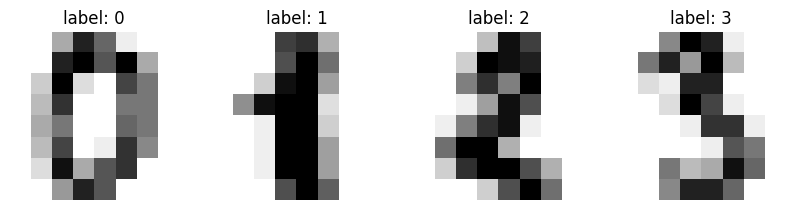

In [7]:
# explore
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("label: %i" % label)

## Daten transformieren

In [8]:
from src.data_prepare import data_prepare
data = data_prepare('params.yaml')

2023-09-11 17:06:28,228 — data_prepare — INFO — Load raw data
2023-09-11 17:06:28,231 — data_prepare — INFO — Prepare data
2023-09-11 17:06:28,233 — data_prepare — INFO — Save prepared data


In [9]:
!python3 src/data_prepare.py --config=params.yaml

2023-09-11 17:06:29,036 — data_prepare — INFO — Load raw data
2023-09-11 17:06:29,467 — data_prepare — INFO — Prepare data
2023-09-11 17:06:29,468 — data_prepare — INFO — Save prepared data


## Datensatz in Trainings- und Testdaten aufteilen

In [10]:
from src.data_split import data_split
train_dataset, test_dataset = data_split('params.yaml')

2023-09-11 17:06:29,868 — data_split — INFO — Load features
2023-09-11 17:06:29,886 — data_split — INFO — Split data
2023-09-11 17:06:29,889 — data_split — INFO — Save split data


In [11]:
!python3 src/data_split.py --config=params.yaml

2023-09-11 17:06:31,296 — data_split — INFO — Load features
2023-09-11 17:06:31,313 — data_split — INFO — Split data
2023-09-11 17:06:31,315 — data_split — INFO — Save split data


## Modell trainieren

In [12]:
%%time

from src.train import train_model
model = train_model('params.yaml')

2023-09-11 17:06:31,647 — train_model — INFO — Load train dataset
2023-09-11 17:06:31,662 — train_model — INFO — Train model
2023-09-11 17:06:31,680 — train_model — INFO — Save model
CPU times: user 61.9 ms, sys: 12.4 ms, total: 74.3 ms
Wall time: 87.9 ms


In [13]:
!python3 src/train.py --config=params.yaml

2023-09-11 17:06:33,203 — train_model — INFO — Load train dataset
2023-09-11 17:06:33,217 — train_model — INFO — Train model
2023-09-11 17:06:33,237 — train_model — INFO — Save model


## Modell testen

2023-09-11 17:06:33,519 — evaluate_model — INFO — Load test dataset
2023-09-11 17:06:33,527 — evaluate_model — INFO — Load model
2023-09-11 17:06:33,529 — evaluate_model — INFO — Test model
2023-09-11 17:06:33,542 — evaluate_model — INFO — Calculate f1 score
2023-09-11 17:06:33,545 — evaluate_model — INFO — Save metrics
2023-09-11 17:06:33,546 — evaluate_model — INFO — Plot confusion matrix
2023-09-11 17:06:33,625 — evaluate_model — INFO — Save confusion matrix


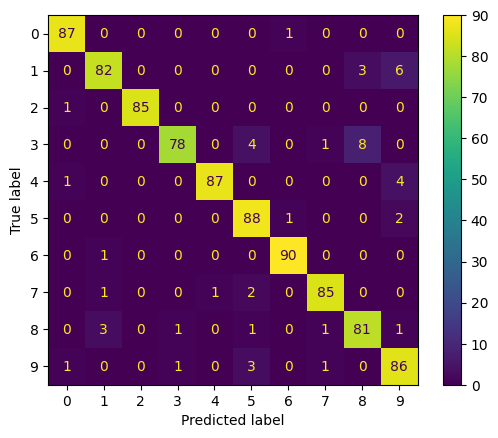

In [14]:
from src.evaluate import evaluate_model
evaluation_results = evaluate_model('params.yaml')

In [15]:
!python3 src/evaluate.py --config=params.yaml

2023-09-11 17:06:36,928 — evaluate_model — INFO — Load test dataset
2023-09-11 17:06:36,941 — evaluate_model — INFO — Load model
2023-09-11 17:06:37,015 — evaluate_model — INFO — Test model
2023-09-11 17:06:37,024 — evaluate_model — INFO — Calculate f1 score
2023-09-11 17:06:37,027 — evaluate_model — INFO — Save metrics
2023-09-11 17:06:37,027 — evaluate_model — INFO — Plot confusion matrix
2023-09-11 17:06:38,976 — evaluate_model — INFO — Save confusion matrix
